# This shows distribution of feature and noise barcodes 

   Rho(0.154)  lifetime  feature
0       600.0  0.000148        0
1         NaN  0.000236        0
2         NaN  0.000971        0
3         NaN  0.001184        0
4         NaN  0.001487        0
Size of the input file: 180


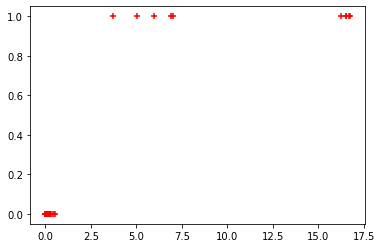

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv("class_600_0.154(600,500,400,300,200).csv")
print(df.head())
print("Size of the input file:",len(df))
plt.scatter(df.lifetime,df.feature,marker="+",color="red")

# Train-test split with cross validation and accuracy score

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


X_train,X_test,y_train,y_test=train_test_split(df[['lifetime']],df.feature,test_size=0.2,random_state=4)
print("The size of test set",len(X_test))
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
score = model.score(X_test,y_test)
print("The ouput of  test set",y_pred)
print("The performance score of the model is", score)
print()


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


The size of test set 36
The ouput of  test set [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
The performance score of the model is 1.0



In [3]:
#### crosss validation

from sklearn.model_selection import KFold
import sklearn


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


linear_scores = sklearn.model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(linear_scores)
print('Average cross-validation score: {:.4f}'.format(linear_scores.mean()))

[1.         1.         0.96551724 1.         1.        ]
Average cross-validation score: 0.9931


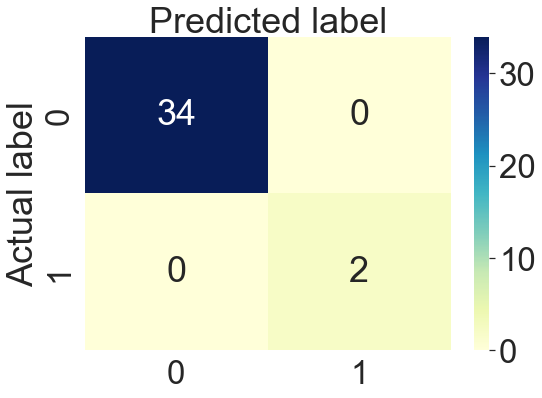

In [9]:
### Confusion Matrix

from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

import seaborn as sns

sns.set(rc={'figure.figsize':(8,6)})     ##### Figure size

sns.set(font_scale=3)                


class_names=[0,1] # name of classes

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
#plt.figure(figsize=(10,10))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

### viridis,YlGnBu,inferno,cividis

ax.xaxis.set_label_position("top")
plt.tight_layout()
#plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


plt.savefig('cnf_mat_jerk.png', bbox_inches='tight',dpi=300)
plt.savefig('cnf_mat_jerk.eps', bbox_inches='tight',dpi=300)

In [4]:
from sklearn.metrics import classification_report
target_names = ['Noise','Features']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Noise       1.00      1.00      1.00        34
    Features       1.00      1.00      1.00         2

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



# This code sequentially takes barcodes extracted from newer parameters and classifies noise count - feature count by the trained ML classifier 

In [5]:

############ 600

Scr = []
Noise_score = []

#gamma = np.linspace(0.164,0.11,55)

gamma = np.arange(0.11,0.155,0.001)


for i in range(len(gamma)): 
    gamma[i] = np.round(gamma[i],3)
    lan = gamma[i]
    
    print("600 Landmarks of gamma:",lan)
    
    
    
    df1 = pd.read_csv(f"test\\ripser_plot_gamma={gamma[i]}_600(diff).csv")             
    
    
    df1.rename(columns={"diff": "lifetime"}, inplace=True)       ##### USE THIS MODIFICATION 
   

    xtest1 = df1[['lifetime']]
    test1 = model.predict(xtest1)
    print("Number of barcodes:",len(xtest1))
    print(f"The output of test set_{lan}:",test1)
#----------------------------------------------------------------------------------------------------------------    
    Noise = 0
    feature = 0
#    print(len(test1))

    for i in range(len(test1)):
        if test1[i] == 0:
            Noise = Noise + 1
        else:
            feature = feature + 1
    print("No of noise:",Noise)
    print("No of features:",feature)
#-----------------------------------------------------------------------------------------------------------------
 
    Score = (Noise)/(feature + 1)
    
    Scr.append(Score)
    
    
    Noise_score.append(Noise)
    
    print("Score:",Score)
    
    print()

print("Noise score:",Noise_score)

print("The score array:",Scr)
print("score length:",len(Scr))

600 Landmarks of gamma: 0.11
Number of barcodes: 124
The output of test set_0.11: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1]
No of noise: 123
No of features: 1
Score: 61.5

600 Landmarks of gamma: 0.111
Number of barcodes: 119
The output of test set_0.111: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1]
No of noise: 115
No of features: 4
Score: 23.0

600 Landmarks of gamma: 0.112
Number of barcodes: 135
The output of test set_0.112: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0

No of noise: 29
No of features: 2
Score: 9.666666666666666

600 Landmarks of gamma: 0.151
Number of barcodes: 35
The output of test set_0.151: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
No of noise: 33
No of features: 2
Score: 11.0

600 Landmarks of gamma: 0.152
Number of barcodes: 38
The output of test set_0.152: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1]
No of noise: 36
No of features: 2
Score: 12.0

600 Landmarks of gamma: 0.153
Number of barcodes: 43
The output of test set_0.153: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1]
No of noise: 41
No of features: 2
Score: 13.666666666666666

600 Landmarks of gamma: 0.154
Number of barcodes: 50
The output of test set_0.154: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1]
No of noise: 48
No of features: 2
Score: 16.0

Noise score: [123, 115, 131, 121, 130, 125, 137, 102, 107, 97, 

    birth      death
0   0.110  61.500000
1   0.111  23.000000
2   0.112  26.200000
3   0.113  30.250000
4   0.114  65.000000
5   0.115  41.666667
6   0.116  68.500000
7   0.117  34.000000
8   0.118  53.500000
9   0.119  48.500000
10  0.120  32.000000
11  0.121  30.333333
12  0.122  14.600000
13  0.123  10.666667
14  0.124   8.000000
15  0.125  10.333333
16  0.126  10.200000
17  0.127   3.250000
18  0.128   1.000000
19  0.129   1.000000
20  0.130   1.250000
21  0.131   1.000000
22  0.132   2.250000
23  0.133   1.250000
24  0.134   1.500000
25  0.135   2.250000
26  0.136   1.250000
27  0.137   2.500000
28  0.138   2.500000
29  0.139   2.000000
30  0.140   2.250000
31  0.141   3.250000
32  0.142   4.000000
33  0.143   4.000000
34  0.144   3.250000
35  0.145   2.250000
36  0.146   5.750000
37  0.147   4.750000
38  0.148   8.333333
39  0.149   7.333333
40  0.150   9.666667
41  0.151  11.000000
42  0.152  12.000000
43  0.153  13.666667
44  0.154  16.000000


<Figure size 1440x720 with 0 Axes>

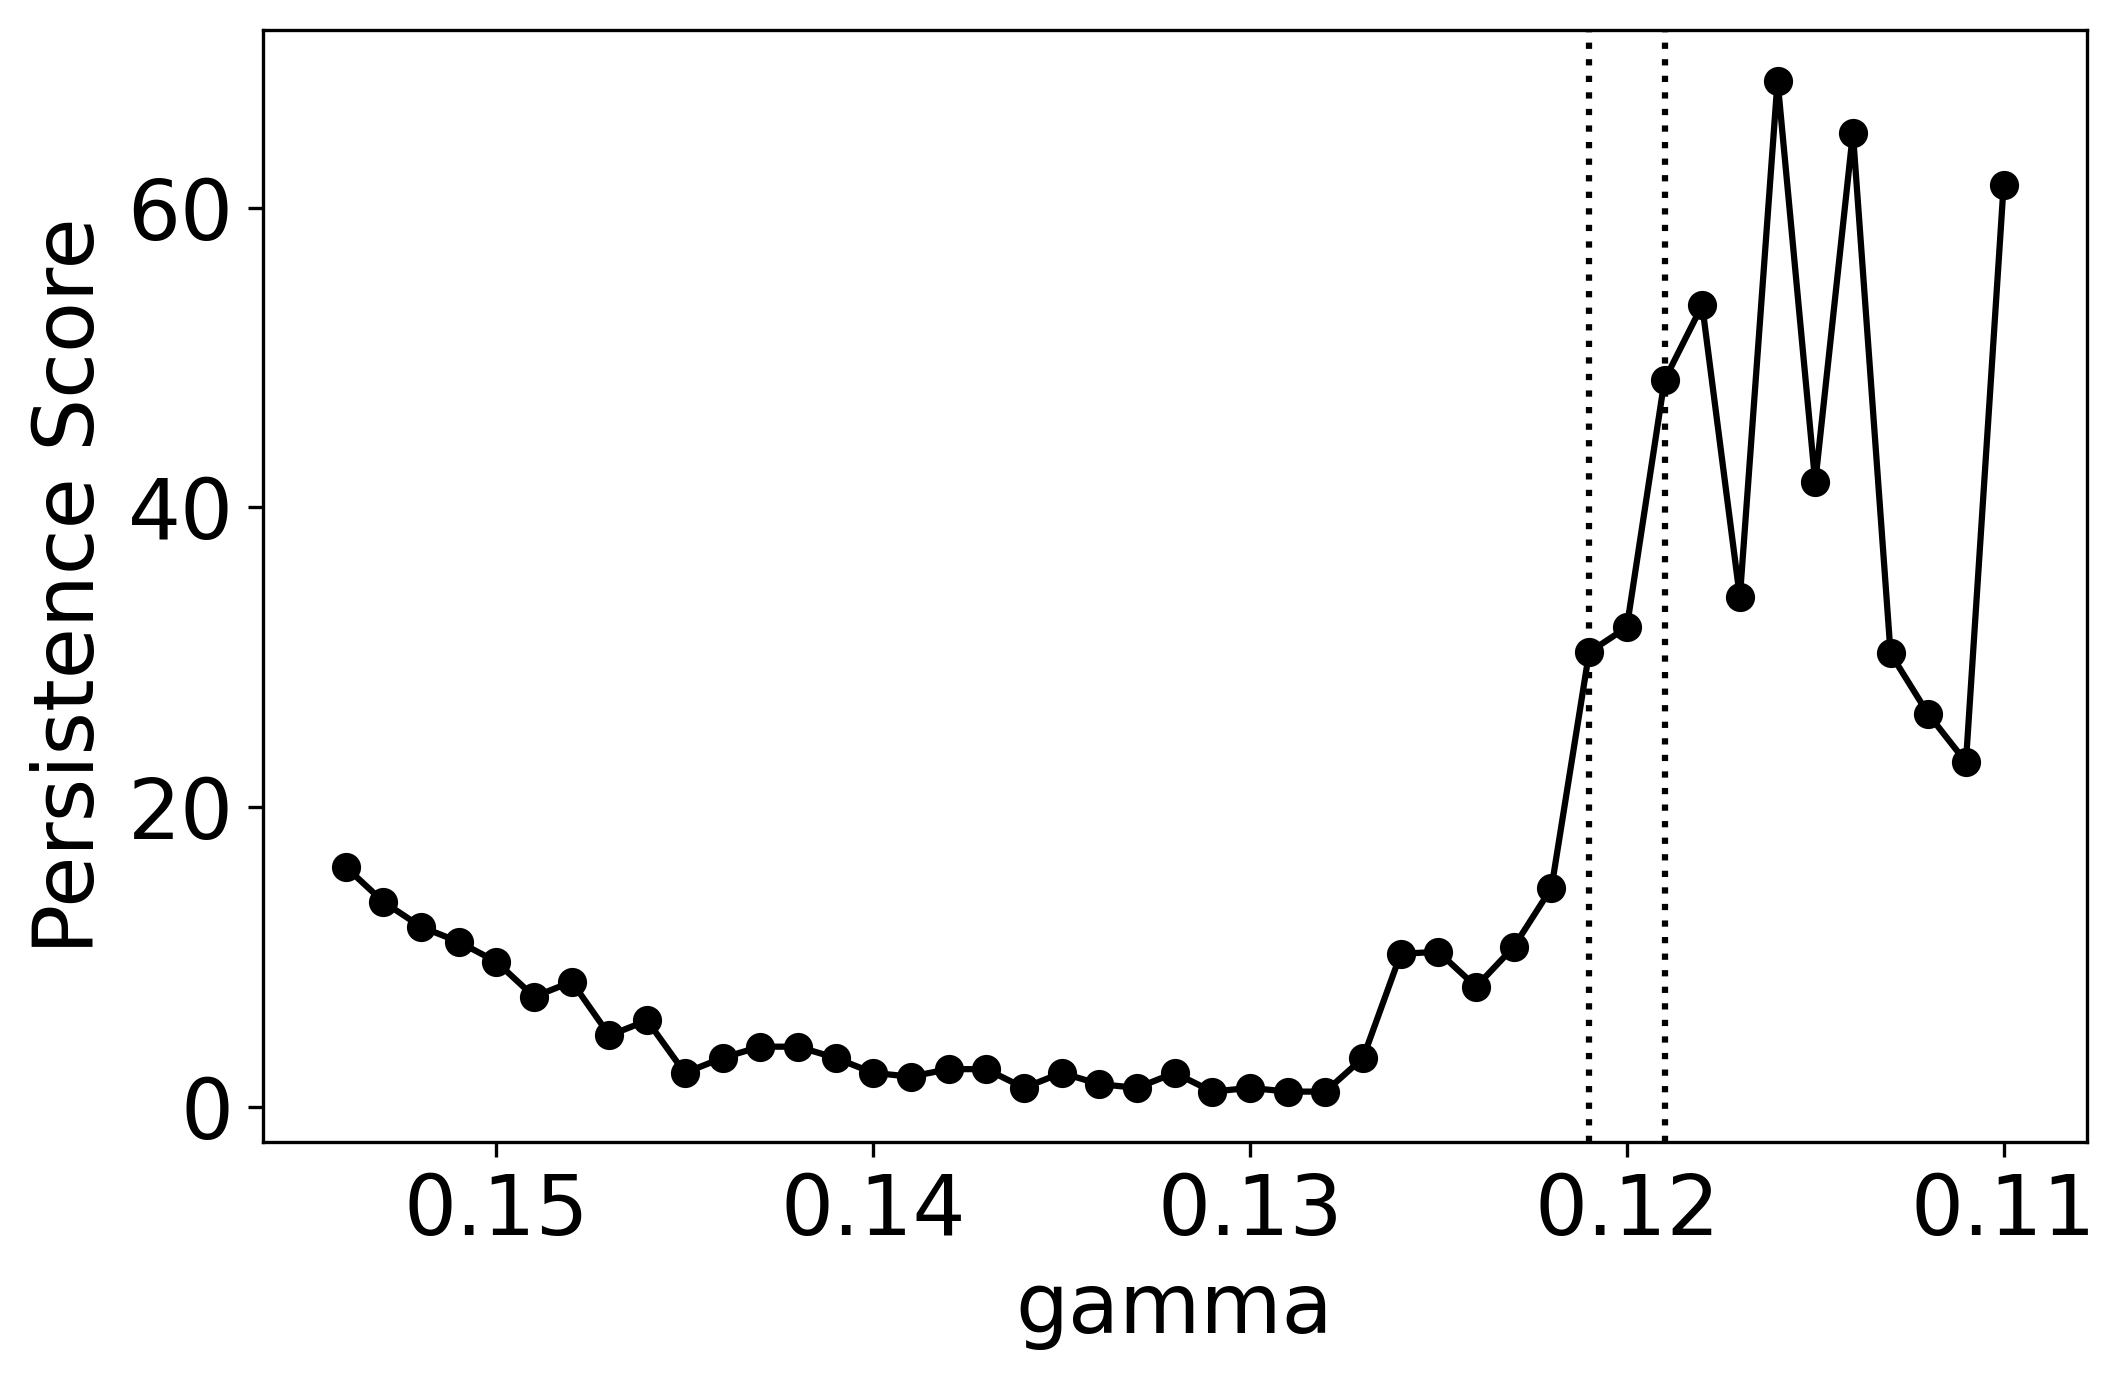

In [6]:
from matplotlib import pyplot as plt
import matplotlib as mpl

fig = plt.figure(figsize=(20,10))


mpl.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(7.5,5),dpi=300)



plt.plot(gamma,Scr,linestyle='-', marker='o', color='k')
plt.ylabel('Persistence Score')
plt.xlabel('gamma')

plt.axvline(x = 0.119, color = 'k', linestyle = ':')
plt.axvline(x = 0.121, color = 'k', linestyle = ':')

ax = plt.gca()
ax.invert_xaxis()
# Adjust layout
plt.tight_layout()


dict = {'birth': gamma, 'death': Scr} 
      
df = pd.DataFrame(dict)

print(df)




#df.to_csv(f'result_600 gamma_PS.csv')

    birth      death
0   0.110  61.500000
1   0.111  23.000000
2   0.112  26.200000
3   0.113  30.250000
4   0.114  65.000000
5   0.115  41.666667
6   0.116  68.500000
7   0.117  34.000000
8   0.118  53.500000
9   0.119  48.500000
10  0.120  32.000000
11  0.121  30.333333
12  0.122  14.600000
13  0.123  10.666667
14  0.124   8.000000
15  0.125  10.333333
16  0.126  10.200000
17  0.127   3.250000
18  0.128   1.000000
19  0.129   1.000000
20  0.130   1.250000
21  0.131   1.000000
22  0.132   2.250000
23  0.133   1.250000
24  0.134   1.500000
25  0.135   2.250000
26  0.136   1.250000
27  0.137   2.500000
28  0.138   2.500000
29  0.139   2.000000
30  0.140   2.250000
31  0.141   3.250000
32  0.142   4.000000
33  0.143   4.000000
34  0.144   3.250000
35  0.145   2.250000
36  0.146   5.750000
37  0.147   4.750000
38  0.148   8.333333
39  0.149   7.333333
40  0.150   9.666667
41  0.151  11.000000
42  0.152  12.000000
43  0.153  13.666667
44  0.154  16.000000


<Figure size 1440x720 with 0 Axes>

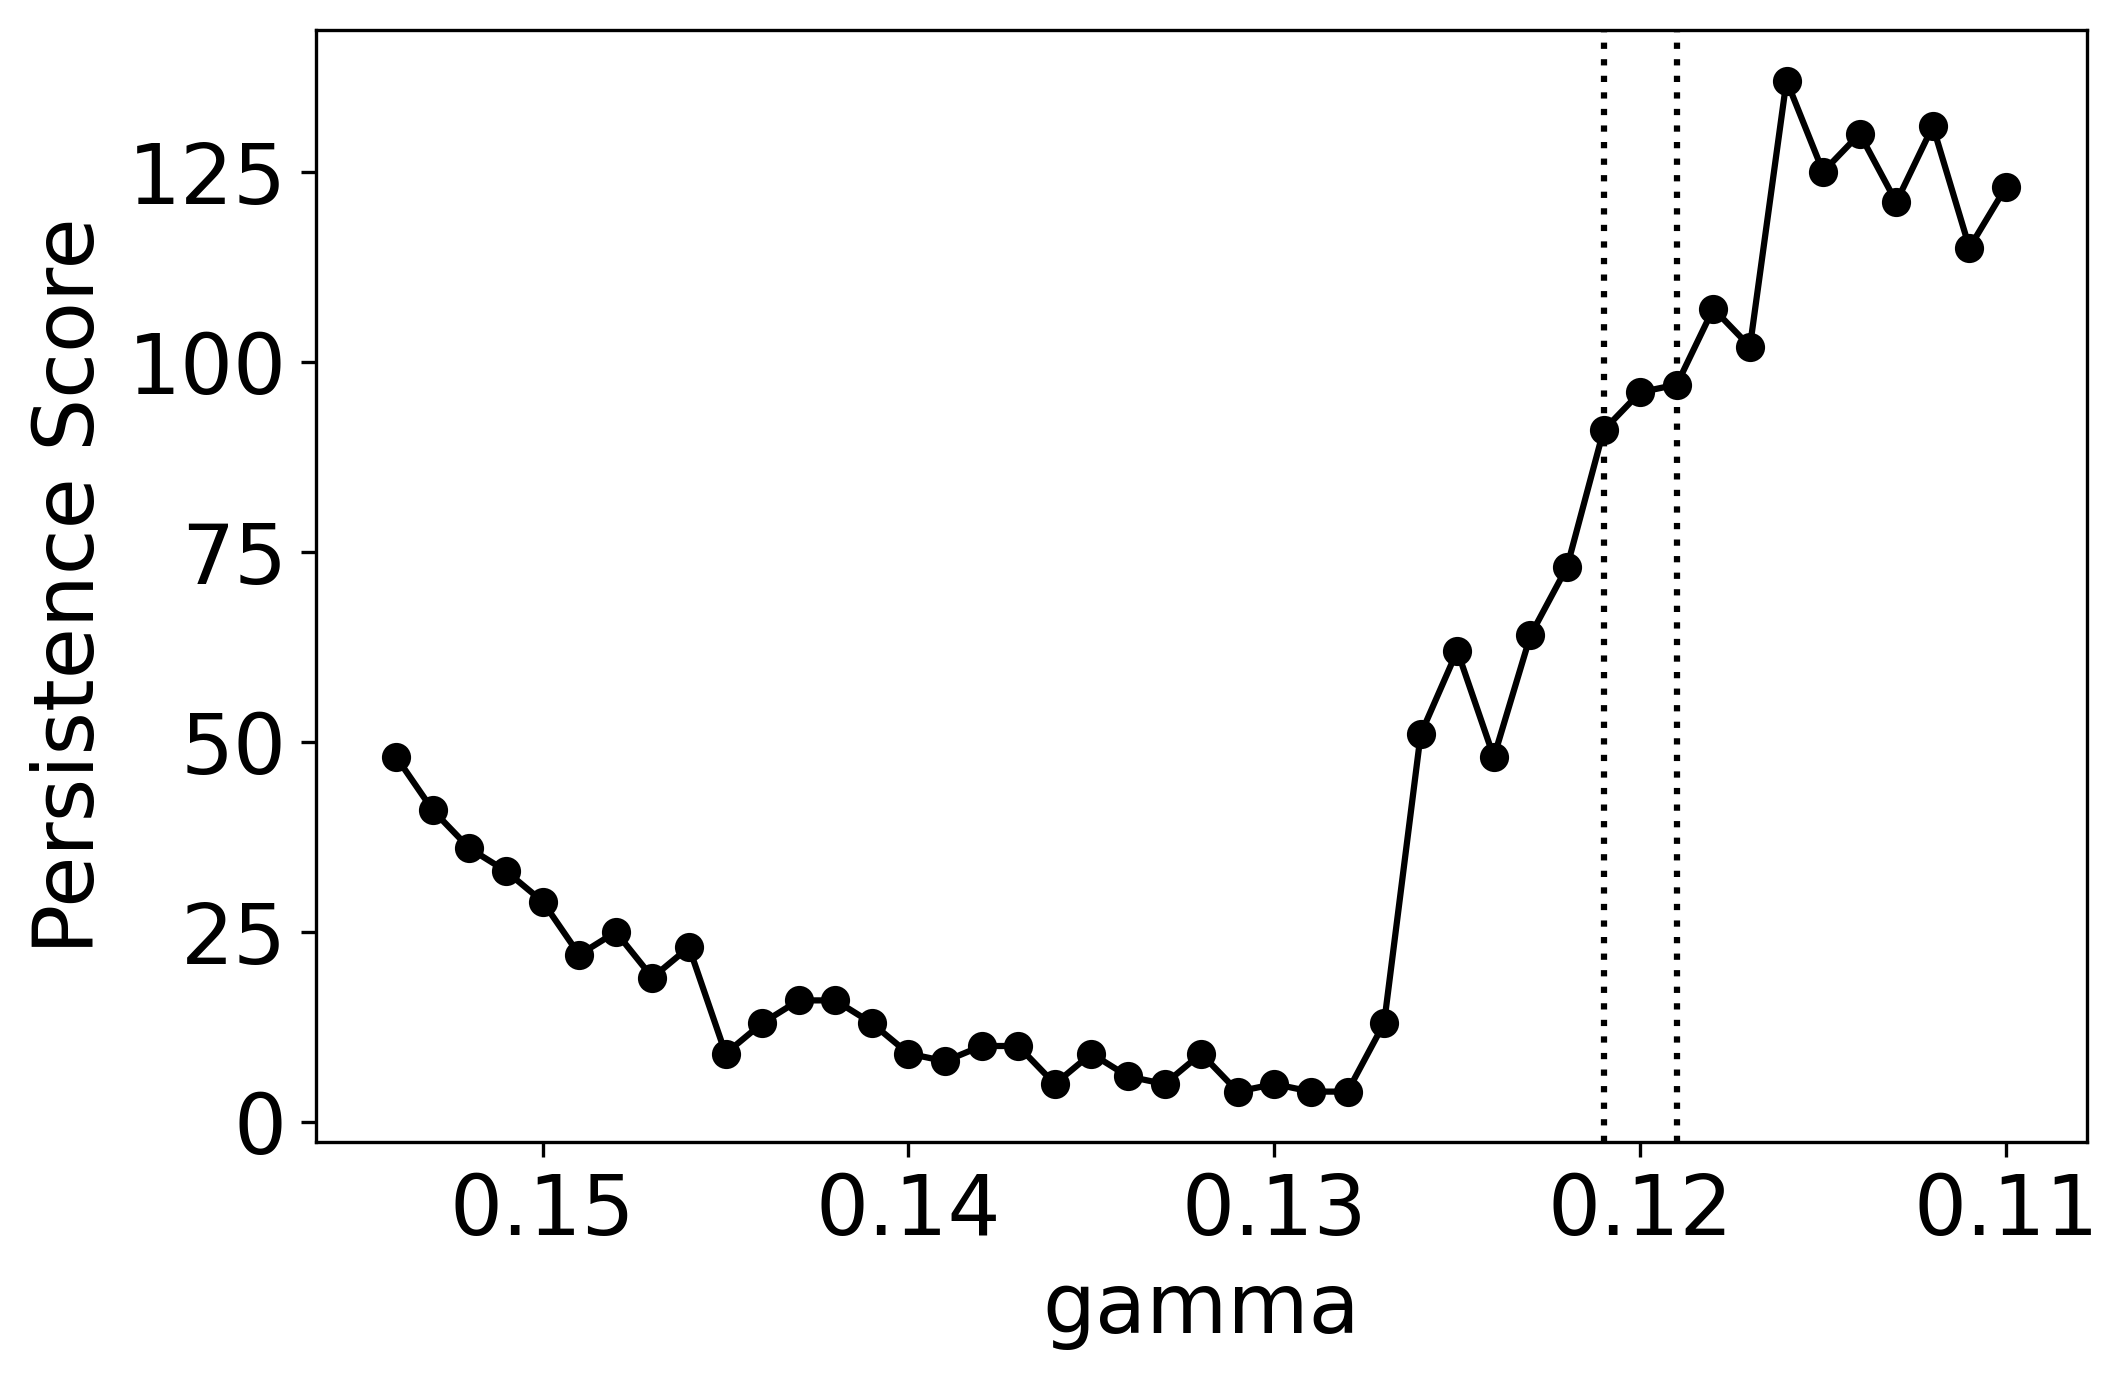

In [7]:
### Noise score

from matplotlib import pyplot as plt
import matplotlib as mpl

fig = plt.figure(figsize=(20,10))


mpl.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(7.5,5),dpi=300)



plt.plot(gamma,Noise_score,linestyle='-', marker='o', color='k')
plt.ylabel('Persistence Score')
plt.xlabel('gamma')

plt.axvline(x = 0.119, color = 'k', linestyle = ':')
plt.axvline(x = 0.121, color = 'k', linestyle = ':')

ax = plt.gca()
ax.invert_xaxis()
# Adjust layout
plt.tight_layout()


dict = {'birth': gamma, 'death': Scr} 
      
df = pd.DataFrame(dict)

print(df)
